In [ ]:
!pip install tbats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 9.6 MB/s 
     |████████████████████████████████| 9.8 MB 50.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from tbats import BATS, TBATS

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cleanedData.csv")

In [ ]:
df.head()

,date,T
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


In [ ]:
df=df.rename(columns={'date':'ds', 'T':'y'})

In [ ]:
df.head()

,ds,y
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


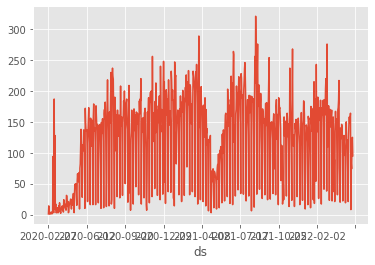

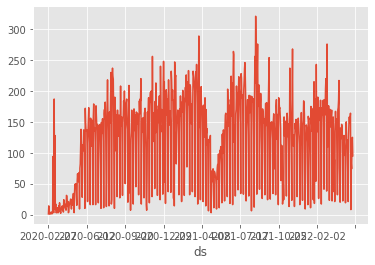

In [ ]:
plt.figure()
df.set_index('ds').y.plot().get_figure()

In [ ]:
train_df=df[df["ds"]<'2021-12-15']
test_df=df[df['ds']>='2021-12-15']
test_df.shape

(143, 2)

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(df);
model.daily_seasonality


True

In [ ]:
future = model.make_future_dataframe(periods=143, freq = 'D')
future.tail()

,ds
932,2022-09-22
933,2022-09-23
934,2022-09-24
935,2022-09-25
936,2022-09-26


In [ ]:
forecast=model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-27,6.475570,16.039494,110.038616,6.475570,6.475570,54.341786,54.341786,54.341786,21.98348,...,23.019176,23.019176,23.019176,9.339130,9.339130,9.339130,0.0,0.0,0.0,60.817356
1,2020-02-28,6.994907,10.686622,102.100678,6.994907,6.994907,48.136317,48.136317,48.136317,21.98348,...,17.138321,17.138321,17.138321,9.014516,9.014516,9.014516,0.0,0.0,0.0,55.131224
2,2020-02-29,7.514244,-23.084572,67.067997,7.514244,7.514244,15.171661,15.171661,15.171661,21.98348,...,-15.568403,-15.568403,-15.568403,8.756584,8.756584,8.756584,0.0,0.0,0.0,22.685905
3,2020-03-02,8.552918,18.152706,111.129213,8.552918,8.552918,52.558237,52.558237,52.558237,21.98348,...,22.121135,22.121135,22.121135,8.453621,8.453621,8.453621,0.0,0.0,0.0,61.111155
4,2020-03-03,9.072255,21.016931,112.232033,9.072255,9.072255,56.980075,56.980075,56.980075,21.98348,...,26.588817,26.588817,26.588817,8.407779,8.407779,8.407779,0.0,0.0,0.0,66.052331


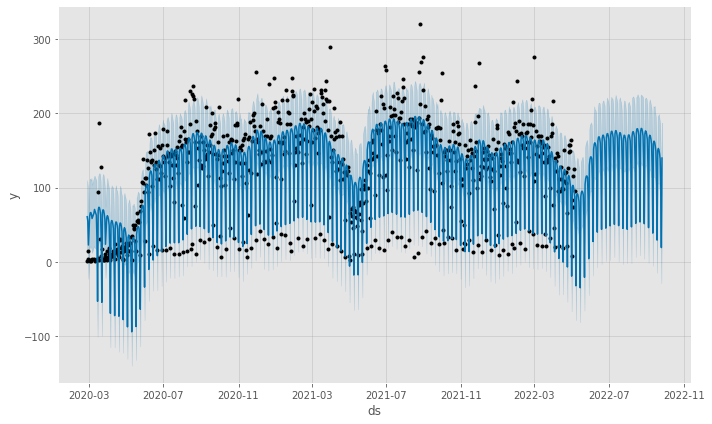

In [ ]:
plot1=model.plot(forecast)

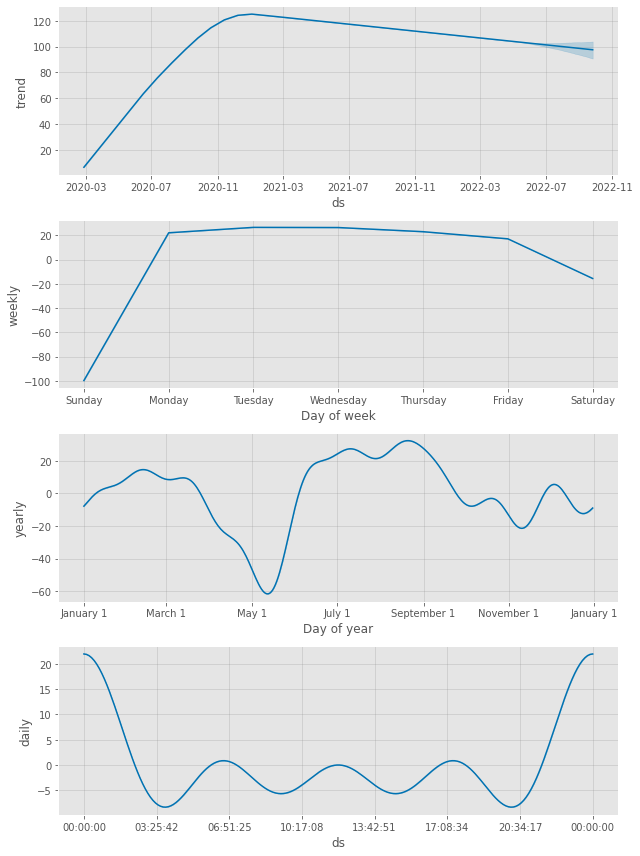

In [ ]:
plot2=model.plot_components(forecast)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-27,60.817356,16.039494,110.038616
1,2020-02-28,55.131224,10.686622,102.100678
2,2020-02-29,22.685905,-23.084572,67.067997
3,2020-03-02,61.111155,18.152706,111.129213
4,2020-03-03,66.052331,21.016931,112.232033


In [ ]:
forecast_sub=forecast[["ds","yhat"]]
forecast_sub["ds"]=forecast_sub["ds"].astype(str)
test_df=test_df[['ds','y']]
metrics_df=test_df.merge(forecast_sub,on=['ds'],how='left')
metrics_df['abserror']=abs(metrics_df['y']-metrics_df['yhat'])
metrics_df['daily_df']=1-(metrics_df['abserror']/metrics_df['y'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
total_y=sum(metrics_df['y'])
total_error=sum(metrics_df['abserror'])
forecast_acc=1-(total_error/total_y)
print(forecast_acc)


0.8148767666278307


In [ ]:
metrics_df.head()

,ds,y,yhat,abserror,daily_df
0,2021-12-15,156,153.048498,2.951502,0.981080
1,2021-12-16,144,148.297129,4.297129,0.970159
2,2021-12-17,128,141.172106,13.172106,0.897093
3,2021-12-18,114,107.327771,6.672229,0.941472
4,2021-12-19,16,22.143026,6.143026,0.616061


In [ ]:
metric_df.tail()

,ds,yhat,y
1154,2023-05-02,89.495095,NaN
1155,2023-05-03,87.298406,NaN
1156,2023-05-04,81.848809,NaN
1157,2023-05-05,74.009261,NaN
1158,2023-05-06,39.445924,NaN
